In [11]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [12]:
train_dir = 'images/new_images/train'
validation_dir = 'images/new_images/test'

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 879 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [14]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [24]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [25]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 40, epochs = 5)

Epoch 1/5
40/40 [==============================] - 180s 4s/step - loss: 1.4207 - acc: 0.5605 - val_loss: 1.2688 - val_acc: 0.5158
Epoch 2/5
40/40 [==============================] - 193s 5s/step - loss: 1.6490 - acc: 0.5141 - val_loss: 1.7850 - val_acc: 0.4615
Epoch 3/5
40/40 [==============================] - 193s 5s/step - loss: 1.3427 - acc: 0.5840 - val_loss: 1.1415 - val_acc: 0.5158
Epoch 4/5
40/40 [==============================] - 168s 4s/step - loss: 1.4192 - acc: 0.5600 - val_loss: 1.1543 - val_acc: 0.5475
Epoch 5/5
40/40 [==============================] - 162s 4s/step - loss: 1.4854 - acc: 0.5522 - val_loss: 0.9923 - val_acc: 0.5430


In [26]:
(eval_loss, eval_accuracy) = base_model.evaluate(  
     validation_generator, batch_size=20, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  

12/12 [==============================] - 12s 954ms/step - loss: 0.9923 - acc: 0.5430
[INFO] accuracy: 54.30%
[INFO] Loss: 0.9922853112220764


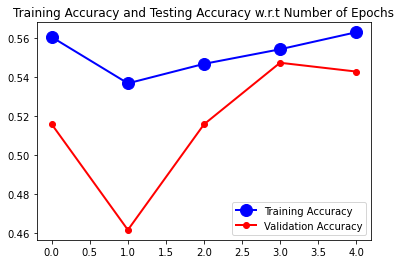

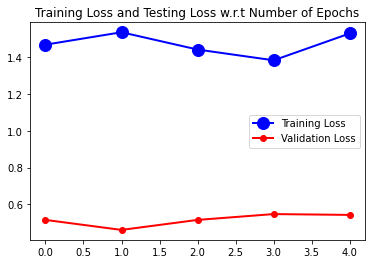

In [27]:
import matplotlib.pyplot as plt

train_acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']
train_loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
No_Of_Epochs = range(5)

plt.plot(No_Of_Epochs, train_acc, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Accuracy')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Accuracy')

plt.title('Training Accuracy and Testing Accuracy w.r.t Number of Epochs')

plt.legend()

plt.figure()

plt.plot(No_Of_Epochs, train_loss, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Loss')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Loss')

plt.title('Training Loss and Testing Loss w.r.t Number of Epochs')

plt.legend()

plt.show()